<h1> Face Mask Detector </h1>

---


> <p><b>Created by:</b> Hamza Zahid</p>
> <p><b>Email ID:</b> hamzashaikhcan@gmail.com</p>

<h1> Description </h1>
Face Mask is developed on Deep Learning using Sequential Model with different hidden layers using Keras on the top of <b>TensorFlow</b>.

> <b>Importing all needed dependencies</b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Input, AveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import time


> <b>Defining Constants</b>

In [ ]:
IMG_SIZE = 224
BASE_PATH = "/content/drive/MyDrive/Datasets/FaceMask Detector/dataset"
DATA_DIR = "/content/drive/MyDrive/Datasets/FaceMask Detector/dataset"
CATEGORIES = ["with_mask", "without_mask"]



> **Verifying data**



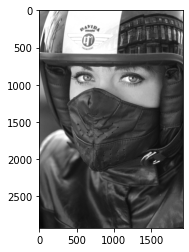

In [ ]:
for categories in CATEGORIES:
    path = os.path.join(DATA_DIR, categories)
    for img in os.listdir(path):
        img_array = cv2.imread( os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break



> **Feature Extraction and Labeling Data**



In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread( os.path.join(path, img))
                new_array = cv2.resize( img_array, (IMG_SIZE, IMG_SIZE) )
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
trainingStartTime = time.perf_counter()
create_training_data()
trainingEndTime = time.perf_counter()

print(f"Total time in creating Dataset is: {trainingEndTime - trainingStartTime:0.4f} seconds")

Total time in creating Dataset is: 29.5169 seconds


> **Seprating Features and Lables**

In [ ]:
import random

from sklearn.model_selection import train_test_split

random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




> **Saving Dataset through Pickel**



In [ ]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()



> **Training Model using Sequential Model with Keras.**
> **Applying Conv2d Layers with activation function of Relu and Flattening the layer and added Dense layer with the activation function of Sigmoid at the end.**



In [ ]:
import tensorflow.keras.backend as K


batch_size = 64
epochs = 10

X = pickle.load( open("X.pickle", "rb") )
y = pickle.load( open("y.pickle", "rb") )

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

model = Sequential()

model.add( Conv2D(64, (3,3), input_shape= X.shape[1:] ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

trainingStartTime = time.perf_counter()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
trainingEndTime = time.perf_counter()

print(f"Total time taken in Training Model is: {trainingEndTime - trainingStartTime:0.4f} seconds")


Epoch 1/10
39/39 [==============================] - 9s 207ms/step - loss: 152.5842 - accuracy: 0.6348 - val_loss: 0.6484 - val_accuracy: 0.6400
Epoch 2/10
39/39 [==============================] - 8s 201ms/step - loss: 0.5334 - accuracy: 0.7495 - val_loss: 0.7659 - val_accuracy: 0.6618
Epoch 3/10
39/39 [==============================] - 8s 202ms/step - loss: 0.4097 - accuracy: 0.8172 - val_loss: 0.8909 - val_accuracy: 0.7273
Epoch 4/10
39/39 [==============================] - 8s 202ms/step - loss: 0.2878 - accuracy: 0.8861 - val_loss: 0.8810 - val_accuracy: 0.7345
Epoch 5/10
39/39 [==============================] - 8s 203ms/step - loss: 0.1831 - accuracy: 0.9376 - val_loss: 1.0683 - val_accuracy: 0.7491
Epoch 6/10
39/39 [==============================] - 8s 203ms/step - loss: 0.1230 - accuracy: 0.9566 - val_loss: 1.1283 - val_accuracy: 0.7455
Epoch 7/10
39/39 [==============================] - 8s 202ms/step - loss: 0.0909 - accuracy: 0.9684 - val_loss: 1.5647 - val_accuracy: 0.7345
Epoc

In [ ]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: "+str(round(loss*100, 2))+"%\nAccuracy: "+str(round(accuracy*100, 2))+"%")


43/43 [==============================] - 2s 38ms/step - loss: 1.3495 - accuracy: 0.8046
Loss: 134.95%
Accuracy: 80.46%


> **Saving the Model**

In [ ]:
from tensorflow import keras
model.save('/content/drive/MyDrive/Datasets/FaceMask Detector/Models/CNN-Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/FaceMask Detector/Models/CNN-Model/assets


> **Loading the pre-defined saved model**

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Datasets/FaceMask Detector/Models/CNN-Model')

> **Defining a function that predicts images**

In [ ]:

def predict_img(file):
    img_array = cv2.imread( file)
    new_array = cv2.resize( img_array, (IMG_SIZE, IMG_SIZE) )
    result = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 3))
    if result[0][0] > 0.5:
        print("Without Mask, Confidence: "+str( result[0][0] )+"%")
    else:
        print("With Mask, Confidence: "+str( result[0][0] )+"%")
    plt.figure()
    plt.imshow(new_array)


> **Predicting persons without Face Masks**

Without Mask, Confidence: 0.9946865%
Without Mask, Confidence: 0.90166384%
Without Mask, Confidence: 0.9962651%


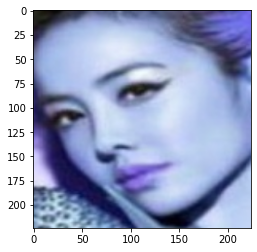

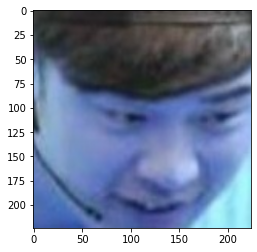

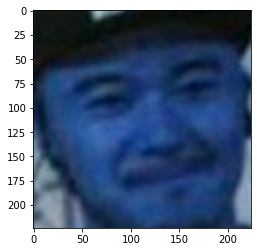

In [ ]:
withoutMaskFileName1 = BASE_PATH+"/without_mask/1 (55).jpg"
withoutMaskFileName2 = BASE_PATH+"/without_mask/1 (88).jpg"
withoutMaskFileName3 = BASE_PATH+"/without_mask/1 (12).jpg"
predict_img(withoutMaskFileName1)
predict_img(withoutMaskFileName2)
predict_img(withoutMaskFileName3)

> **Predicting persons with Face Masks**

With Mask, Confidence: 3.8076688e-11%
With Mask, Confidence: 0.20353837%
With Mask, Confidence: 0.0041768756%


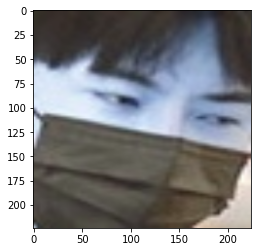

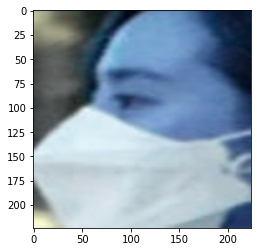

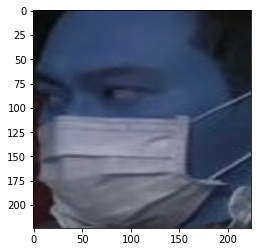

In [ ]:
withMaskFileName1 = BASE_PATH+"/with_mask/1 (35).jpg"
withMaskFileName2 = BASE_PATH+"/with_mask/1 (45).jpg"
withMaskFileName3 = BASE_PATH+"/with_mask/1 (24).jpg"
predict_img(withMaskFileName1)
predict_img(withMaskFileName2)
predict_img(withMaskFileName3)

> **Plotting Graph between Accuracy and Validation Accuracy**

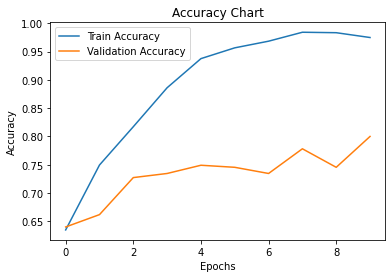

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Chart")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

> **Plotting Graph between Loss and Validation Loss**

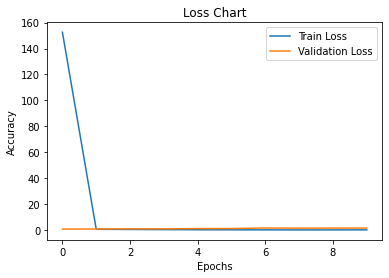

In [ ]:
plt.title("Loss Chart")
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

> **Getting Summary of the Model**

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_16 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_17 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 186624)          